In [54]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [55]:
# importing dataset

column_names=['userid','productid','rating','timestamp']
df=pd.read_csv('DATASETS/ratings_Electronics (1).csv',names=column_names)
df.head()

,userid,productid,rating,timestamp
0,A2NWSAGRHCP8N5,321732944,5,1341100800
1,A2WNBOD3WNDNKT,439886341,1,1367193600
2,A1GI0U4ZRJA8WN,439886341,3,1374451200
3,A1QGNMC6O1VW39,439886341,1,1334707200
4,A3J3BRHTDRFJ2G,511189877,5,1397433600


In [56]:
df = df.drop('timestamp', axis=1) # dropping 'timestamp' as it is not required

In [57]:
df_copy=df.copy

In [58]:
df.head()

,userid,productid,rating
0,A2NWSAGRHCP8N5,321732944,5
1,A2WNBOD3WNDNKT,439886341,1
2,A1GI0U4ZRJA8WN,439886341,3
3,A1QGNMC6O1VW39,439886341,1
4,A3J3BRHTDRFJ2G,511189877,5


In [59]:
df.shape

(1033749, 3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033749 entries, 0 to 1033748
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1033749 non-null  object
 1   productid  1033749 non-null  object
 2   rating     1033749 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 23.7+ MB


In [61]:
# finding missing values

df.isnull().sum()

userid       0
productid    0
rating       0
dtype: int64

In [62]:
df.rating.describe()

count    1.033749e+06
mean     3.973821e+00
std      1.399433e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

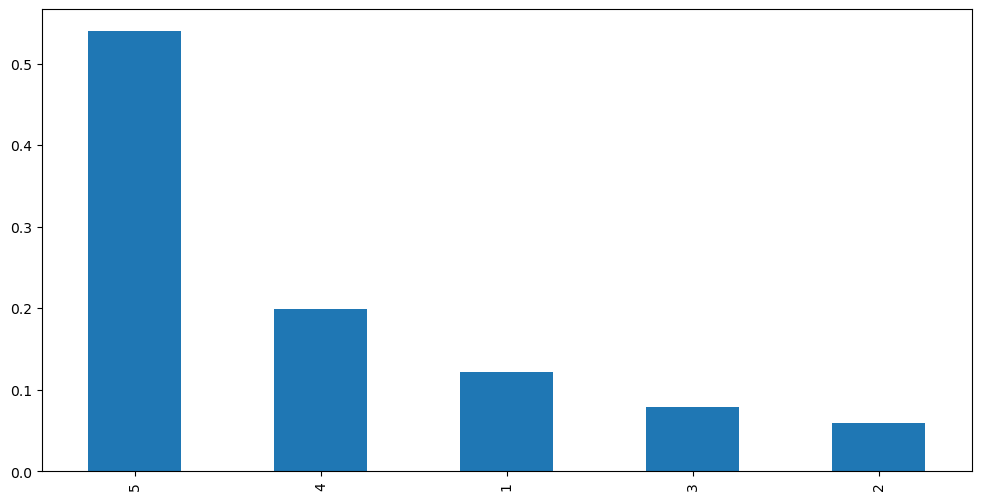

In [63]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

# the bar graph is presented to show the ratings

In [64]:
# Number of unique userid and productid in the data

print('Number of unique USERS in Raw data = ', df['userid'].nunique())
print('Number of unique ITEMS in Raw data = ', df['productid'].nunique())

Number of unique USERS in Raw data =  775935
Number of unique ITEMS in Raw data =  61285


In [65]:
# Top 10 users based on rating

most_rated = df.groupby('userid').size().sort_values(ascending=False)[:10]
most_rated

userid
A5JLAU2ARJ0BO     410
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      145
AT6CZDCP4TRGA     127
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     94
A203OCQQ12MAVT     89
dtype: int64

In [66]:
counts = df['userid'].value_counts()
df1 = df[df['userid'].isin(counts[counts>=10].index)]

In [67]:
df1.shape

(36956, 3)

In [68]:
print('Number of unique USERS in final dataset = ', df1['userid'].nunique())
df1.userid.unique()

Number of unique USERS in final dataset =  2298


array(['AT09WGFUM934H', 'A17HMM1M7T9PJ1', 'A6J8D9V5S9MBE', ...,
       'A1RCGK44YXNBBB', 'A3SXLK1MHY9P29', 'A1925WP0C8AGLB'], dtype=object)

In [69]:
# number of unique productid

df1.productid.nunique()

15583

In [70]:
# First, checking for duplicates
duplicates = df1[df1.duplicated(subset=['userid', 'productid'], keep=False)]
if not duplicates.empty:
    print("Found duplicates:",len(duplicates))

# If duplicates exist, aggregating by mean (or sum, or any other method)
df1_aggregated = df1.groupby(['userid', 'productid']).agg({'rating': 'mean'}).reset_index()

# Creating the pivot table with the aggregated data
final_ratings_matrix = df1_aggregated.pivot(index='userid', columns='productid', values='rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)


# Finding the number of non-zero entries in the interaction matrix (pivot table)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)


# Finding the possible number of ratings as per the number of users and products

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)


# Density of ratings

density = (given_num_of_ratings/possible_num_of_ratings) * 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Found duplicates: 100
Shape of final_ratings_matrix:  (2298, 15583)
given_num_of_ratings =  36906
possible_num_of_ratings =  35809734
density: 0.10%


productid,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000I62PEU,B000I62PHC,B000I62WVQ,B000I634WC,B000I647VO,B000I64NTA,B000I661J0,B000I66DQQ,B000I67SIS,B000I68BD4
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1053TBGTIEQ8V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Popularity (rank) Based Recommendation System

In [71]:
#Calculating the average rating for each product 
average_rating = df1.groupby('productid').mean()['rating']

#Calculating the count of ratings for each product
count_rating = df1.groupby('productid').count()['rating']

#Creating a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sorting the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

C:\Users\Valeska Dsouza\AppData\Local\Temp\ipykernel_6928\998300425.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = df1.groupby('productid').mean()['rating']


,avg_rating,rating_count
productid,,
B000CO90N2,5.0,1
B0000AKABI,5.0,2
B000A6QSLE,5.0,1
B0000ALKAN,5.0,2
B0000ALKAM,5.0,1


In [72]:
# defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):
    
    # Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

In [73]:
# Recommending top 5 products with 50 minimum interactions based on popularity

list(top_n_products(final_rating, 5, 50))

['B0000BZL1P', 'B00017LSPI', 'B000AZ57M6', 'B00005LEN4', 'B00009XVCZ']

In [74]:
# top 5 products with minimum 80 interactions based on popularity

list(top_n_products(final_rating,5,80))

['B0002L5R78', 'B00007E7JU', 'B00004ZCJE', 'B00007KDVI']

### Collaborative Recommendation System
#### User based collaborative filtering

In [75]:
final_ratings_matrix.head()

productid,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000I62PEU,B000I62PHC,B000I62WVQ,B000I634WC,B000I647VO,B000I64NTA,B000I661J0,B000I66DQQ,B000I67SIS,B000I68BD4
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1053TBGTIEQ8V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users

final_ratings_matrix.head()

productid,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000I62PEU,B000I62PHC,B000I62WVQ,B000I634WC,B000I647VO,B000I64NTA,B000I661J0,B000I66DQQ,B000I67SIS,B000I68BD4
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# defining a function to find similar users and their similarity scores

def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):
        
        # finding cosine similarity between the userid and each user
        simscore = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        # Appending the user and the corresponding similarity score with userid as a tuple
        similarity.append((user,simscore))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] 
    similarity_score = [tup[1] for tup in similarity]
   
    # Removing the original user and its similarity score and keeping only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score
     

In [78]:
# finding top 10 similar users to the user index 6 and their similarity score

similar = similar_users(6,final_ratings_matrix)[0][0:10]
similar

[1053, 666, 1039, 1403, 221, 1089, 1520, 732, 1941, 1537]

In [79]:
similar_users(6,final_ratings_matrix)[1][0:10]
# displayed below is the similarity score

[array([[0.10638448]]),
 array([[0.10341267]]),
 array([[0.09496715]]),
 array([[0.08717843]]),
 array([[0.07957836]]),
 array([[0.07836091]]),
 array([[0.07718937]]),
 array([[0.07449836]]),
 array([[0.07449836]]),
 array([[0.06538777]])]

In [80]:
# finding top 12 similar users to the user index 1682 and their similarity score

similar = similar_users(1682,final_ratings_matrix)[0][0:12]
similar

[277, 1490, 95, 1441, 880, 1060, 1482, 1923, 940, 900, 1027, 33]

In [81]:
similar_users(1682,final_ratings_matrix)[1][0:12]

# displayed below is the similarity score

[array([[0.13796582]]),
 array([[0.12731882]]),
 array([[0.11814687]]),
 array([[0.10873741]]),
 array([[0.10825453]]),
 array([[0.10717276]]),
 array([[0.1070627]]),
 array([[0.10626579]]),
 array([[0.10451883]]),
 array([[0.10312704]]),
 array([[0.10231819]]),
 array([[0.10205277]])]

### Function to recommend products

In [82]:
# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions=prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations)<num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]

In [85]:
# Recommending 5 products to user index 245 based on similarity based collaborative filtering

recommendations(245,5,final_ratings_matrix)

['B00005LENO', 'B000E1FYQA', 'B0009PCX7O', 'B00067TTY0', 'B00007EDYY']

In [86]:
# Recommending 10 products to user index 1346 based on similarity based collaborative filtering

recommendations(1346,10,final_ratings_matrix)

['B000E1FYQA',
 'B000ASBKJ2',
 'B000C7IKVM',
 'B0009PXEEU',
 'B0002L596M',
 'B000204SWE',
 'B000EIEEYG',
 'B0009WX4KM',
 'B0002HS1A2',
 'B000FEJNLI']

#### Model based Collaborative Filtering: Singular Value Decomposition (SVD)

#### CSR Matrix

In [87]:
from scipy.sparse import csr_matrix
final_ratings_sparse = csr_matrix(final_ratings_matrix.values)

#### SVD

In [88]:
U, s, Vt = svds(final_ratings_sparse, k = 50) # k is the number of latent features

# Constructing diagonal array in SVD
sigma = np.diag(s)

In [89]:
U.shape

(2298, 50)

In [90]:
sigma.shape

(50, 50)

In [91]:
Vt.shape

(50, 15583)

In [103]:
# Predicting ratings

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

preds_df = pd.DataFrame(abs(all_user_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [102]:
# Function to recommend products

def recommend_items(user_index, interactions_matrix, preds_matrix, num_recommendations):
    
    # Getting the user's ratings from the actual and predicted interaction matrices
    user_ratings = interactions_matrix[user_index,:].toarray().reshape(-1)
    user_predictions = preds_matrix[user_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'user_ratings': user_ratings, 'user_predictions': user_predictions})
    temp['Recommended Products'] = np.arange(len(user_ratings))
    temp = temp.set_index('Recommended Products')
    
    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.user_ratings == 0]   
    
    #Recommending products with top predicted ratings
    temp = temp.sort_values('user_predictions',ascending=False)#Sort the dataframe by user_predictions in descending order
    print('\nBelow are the recommended products for user(user_id = {}):\n'.format(user_index))
    print(temp['user_predictions'].head(num_recommendations))

In [94]:
# Recommending top 10 products to user id 50

recommend_items(50,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for user(user_id = 50):

Recommended Products
10344    0.661904
10526    0.618749
1067     0.613969
9047     0.493971
12472    0.425925
14500    0.342541
5313     0.342037
3265     0.333793
10227    0.332425
11955    0.326777
Name: user_predictions, dtype: float64


In [95]:
# Recommending top 8 products to user id 241

recommend_items(241,final_ratings_sparse,preds_matrix,8)


Below are the recommended products for user(user_id = 241):

Recommended Products
4392     0.153122
14091    0.113174
2591     0.109076
2953     0.099100
4563     0.096159
7731     0.091722
7103     0.084482
3610     0.084364
Name: user_predictions, dtype: float64


# Evaluating the model

In [96]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users

final_ratings_matrix.head()

productid,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000I62PEU,B000I62PHC,B000I62WVQ,B000I634WC,B000I647VO,B000I64NTA,B000I661J0,B000I66DQQ,B000I67SIS,B000I68BD4
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

productid
1400501466    0.004787
1400501520    0.002176
1400501776    0.002176
1400532620    0.006527
1400532655    0.013925
dtype: float64

In [98]:
preds_df.head()

productid,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,...,B000I62PEU,B000I62PHC,B000I62WVQ,B000I634WC,B000I647VO,B000I64NTA,B000I661J0,B000I66DQQ,B000I67SIS,B000I68BD4
0,0.000151,0.006415,0.000476,0.011639,0.041123,0.009835,0.000962,0.006959,0.012601,0.006338,...,0.003919,0.001054,0.008166,0.000804,0.000390,0.003828,0.000567,0.018833,0.000123,0.060840
1,0.003983,0.002470,0.038079,0.021430,0.008916,0.008952,0.007381,0.002365,0.020328,0.016485,...,0.000376,0.001946,0.011040,0.001893,0.000287,0.011891,0.001346,0.014656,0.001065,0.089140
2,0.004650,0.000258,0.001375,0.003690,0.000447,0.000316,0.004492,0.000822,0.019153,0.011078,...,0.003691,0.000065,0.002883,0.000806,0.000295,0.006604,0.009263,0.000493,0.000036,0.007225
3,0.000736,0.003584,0.000610,0.006192,0.035541,0.001029,0.007413,0.004573,0.000232,0.000288,...,0.003167,0.001918,0.007900,0.001593,0.000767,0.004051,0.016033,0.002283,0.000530,0.010493
4,0.000084,0.001182,0.002891,0.008235,0.003606,0.035505,0.006928,0.000498,0.015937,0.005532,...,0.006063,0.000152,0.002709,0.023367,0.002168,0.007670,0.006613,0.001293,0.001283,0.067700


In [99]:
avg_preds=preds_df.mean()
avg_preds.head()

productid
1400501466    0.002497
1400501520    0.001412
1400501776    0.003253
1400532620    0.008436
1400532655    0.018530
dtype: float64

In [100]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
productid,,
1400501466,0.004787,0.002497
1400501520,0.002176,0.001412
1400501776,0.002176,0.003253
1400532620,0.006527,0.008436
1400532655,0.013925,0.018530


In [101]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.010694880192128699 

